# 1. Introdução 

Nosso trabalho aqui consiste em criar um modelo para prever preços de carros, a partir de suas características. Para construção do modelo, faremos uso do XGBoost, pois apresentou melhores resultados no teste. 

### Dicionário de Variáveis 
O dataset que utilizamos conta com o seguinte dicionário de variáveis:
- name: o nome do modelo do carro 
- year: o ano de fabricação do carro. 
- selling_price: o preço de venda do carro.
- km_driven: a quantidade de km que o carro percorreu. 
- fuel: o tipo de combustível utilizado pelo carro. 
- seller_type: o tipo de vendedor.
- transmission: o tipo de transmissão do carro. 
- owner: o numéro de proprietários anteriores do carro. 
- seats: o numéro de assentos no carro. 
- max_power: a potência máxima do motor do carro. 
- mileage_unit: a unidade utilizada para medir a eficiência de combustível. 
- mileage: a eficiência do combustível, indicando a distância percorrida por litro de combustível. 
- engine: a capacidade do motor do carro. 

O link do dataset pode ser acessado em: https://www.kaggle.com/datasets/jacksondivakarr/sample34

# 2. Bibliotecas

In [334]:
# Bibliotecas para EDA
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Mostrar todas as colunas de um dataframe 
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# 3. Inspeção dos Dados

In [335]:
# Importando Dataset 
base = pd.read_csv('pricecar.csv')
base.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [336]:
# Contagem de Linhas e Colunas
base.shape

(2095, 14)

In [337]:
# mean para ver a proporção de missing
base.isna().mean()

Unnamed: 0            0.0
name                  0.0
year                  0.0
selling_price         0.0
km_driven             0.0
fuel                  0.0
seller_type           0.0
transmission          0.0
owner                 0.0
seats                 0.0
max_power (in bph)    0.0
Mileage Unit          0.0
Mileage               0.0
Engine (CC)           0.0
dtype: float64

In [338]:
# Verificação do tipo de cada variável 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [339]:
# Criação de coluna de 'idade' = current_year - ano de fabricação
df = base 
current_year = 2024 
df['idade'] = current_year - df['year']

# 4. Análise Exploratória

<AxesSubplot:>

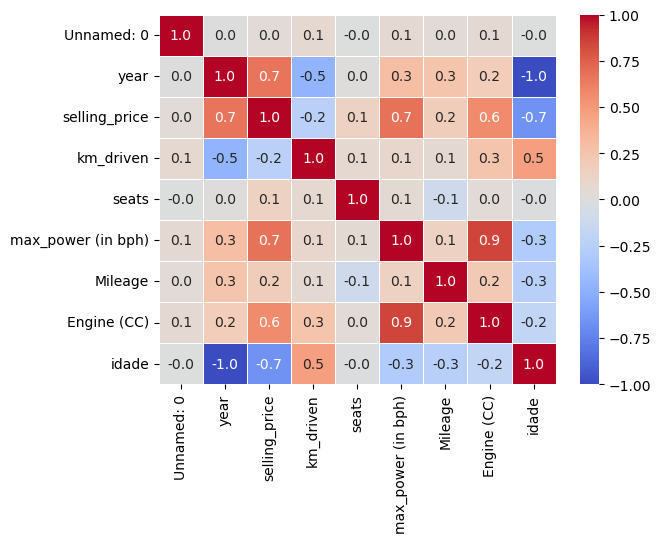

In [340]:
# Correlação das variáveis numéricas 
correlation = df.corr()
plot_correlation = sns.heatmap(correlation, cmap='coolwarm', annot = True, fmt=".1f", linewidths =.6)
plot_correlation 

## 4.1 Correlação entre Valor de Venda e Idade 

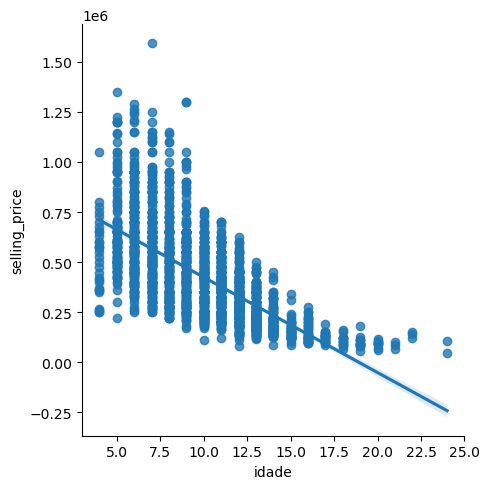

In [341]:
# Configurando gráfico de dispersão 
sns.lmplot(data=df, x='idade', y='selling_price')


## 4.2 Análise da quantidade de proprietários com valor de venda 

Text(0.5, 1.0, 'Distribuição da amostra por tipo de proprietário')

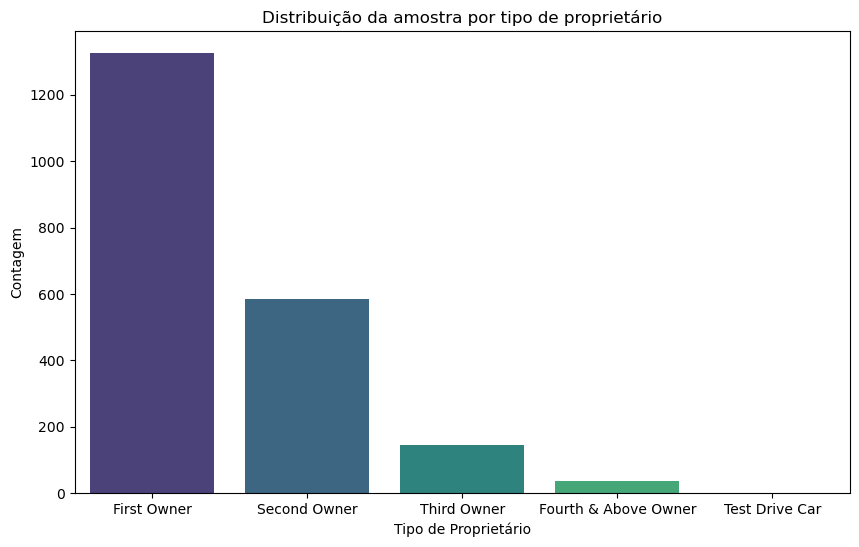

In [342]:
# Análise do tamanho da amostra por categoria 
plt.figure(figsize=(10, 6))
sns.countplot(x='owner', data=df, palette='viridis')

# Adicionando rótulos 
plt.xlabel('Tipo de Proprietário')
plt.ylabel('Contagem')
plt.title('Distribuição da amostra por tipo de proprietário')

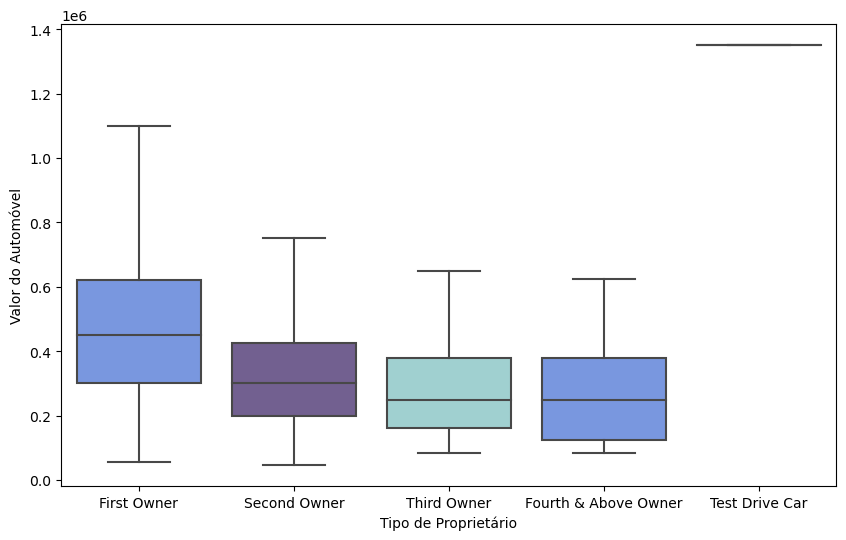

In [343]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(10, 6))
colors = ['#6890F0', '#705898', '#98D8D8']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
sns.boxplot(x='owner', y='selling_price',data=df, showfliers=False, palette=colors)
plt.xlabel('Tipo de Proprietário')
plt.ylabel('Valor do Automóvel')
plt.show()

Observa-se que apesar da diferença amostral entre as categorias, uma tendência de queda do valor mediano e dos valores máximos obtidos por um determinado automóvel a medida aumentamos o número de proprietários.

In [344]:
remover = 'Test Drive Car'
df = df[df['owner'] != remover]

## 4.3 Correlação entre Valor de Venda e Potência do Motor

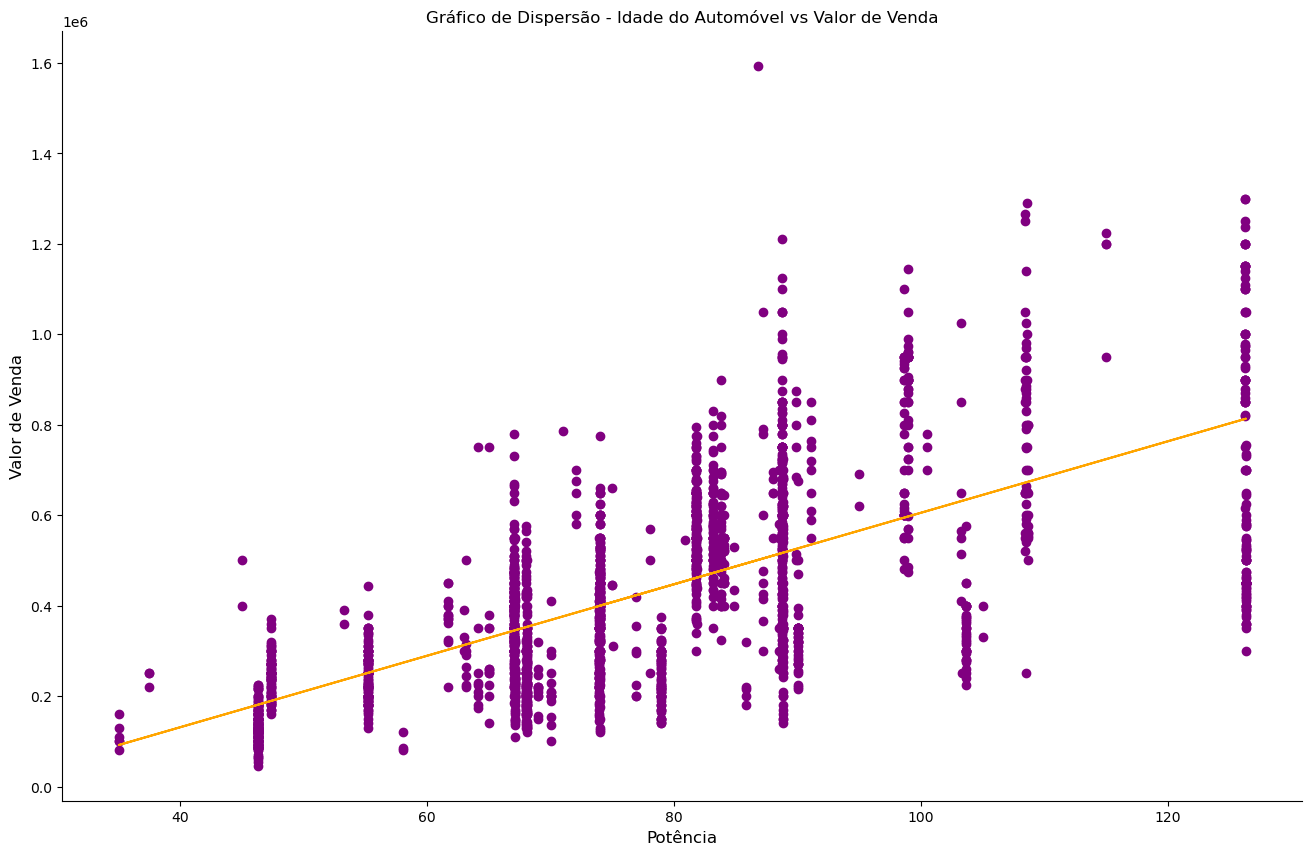

In [345]:
# Configurando gráfico de dispersão 
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(df['max_power (in bph)'],df['selling_price'],  c = "purple")

# Adicionar Linha de Tendência
coeficiente = np.polyfit(df['max_power (in bph)'], df['selling_price'], 1)
tendencia = np.poly1d(coeficiente)
ax.plot(df['max_power (in bph)'], tendencia(df['max_power (in bph)']), color='orange', label='Linha de Tendência')

#Título e Rótulos
ax.set_title('Gráfico de Dispersão - Idade do Automóvel vs Valor de Venda', fontsize=12)
ax.set_xlabel('Potência', fontsize=12)
ax.set_ylabel('Valor de Venda',fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Assim como visualizamos por meio do coeficiente de pearson, existe uma correlação positiva entre a variável target e a potência do motor. 

## 4.4 Correlação entre Transmissão e Valor da Renda

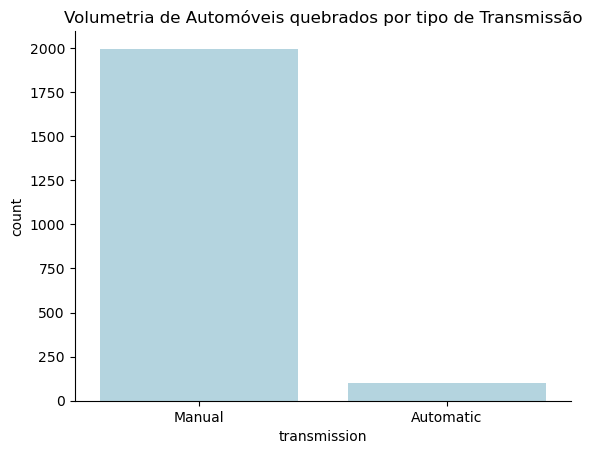

In [346]:
# Plot do Gráfico
sns.countplot(x='transmission', data=df, color='lightblue')
plt.title('Volumetria de Automóveis quebrados por tipo de Transmissão')
sns.despine(top=True, right=True)
plt.show()

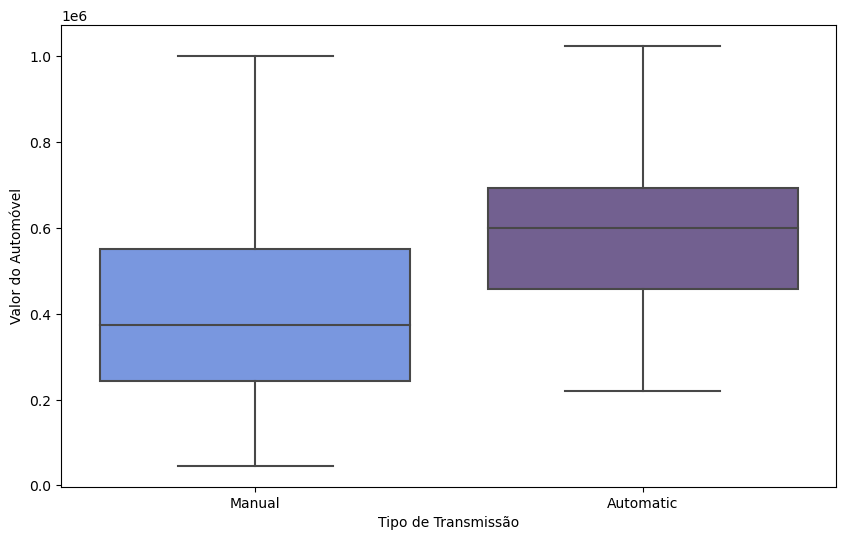

In [347]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(10, 6))
colors = ['#6890F0', '#705898']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
sns.boxplot(x='transmission', y='selling_price',data=df, showfliers=False, palette=colors)
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Valor do Automóvel')
plt.show()

A volumetria da amostra quebrada por tipos de Transmissão (Manual ou Automática) é bastante desbalanceado. Da amostra que dispomos observa-se uma tendência dos automóveis automáticos apresentarem um valor médio superior. 

# 5. Modelagem 

A escolha das features decorre das análises realizadas entre as features e o target.

In [348]:
# Preprocessamento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from category_encoders import TargetEncoder, CatBoostEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

# Importando as bibliotecas para modelagem 
import lightgbm as lgb 
from xgboost import XGBRegressor

# Validação do modelo 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2094
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2094 non-null   int64  
 1   name                2094 non-null   object 
 2   year                2094 non-null   int64  
 3   selling_price       2094 non-null   int64  
 4   km_driven           2094 non-null   int64  
 5   fuel                2094 non-null   object 
 6   seller_type         2094 non-null   object 
 7   transmission        2094 non-null   object 
 8   owner               2094 non-null   object 
 9   seats               2094 non-null   int64  
 10  max_power (in bph)  2094 non-null   float64
 11  Mileage Unit        2094 non-null   object 
 12  Mileage             2094 non-null   float64
 13  Engine (CC)         2094 non-null   int64  
 14  idade               2094 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 261.8+

In [350]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[cat_cols])
df[cat_cols] = encoded_data.astype(int)
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),idade
0,0,1,2014,450000,145500,1,1,1,1,5,74.00,1,23.40,1248,10
1,2,2,2010,225000,127000,1,1,1,1,5,90.00,1,23.00,1396,14
2,4,2,2017,440000,45000,2,1,1,1,5,81.86,1,20.14,1197,7
3,7,3,2011,350000,90000,1,1,1,1,5,67.10,1,23.59,1364,13
4,8,4,2013,200000,169000,1,1,1,1,5,68.10,1,20.00,1399,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,6245,1,2017,425000,12000,2,1,1,1,5,67.04,1,23.10,998,7
2091,6246,3,2014,425000,50000,1,1,1,1,5,67.06,1,23.59,1364,10
2092,6249,1,2011,200000,73000,2,1,1,1,5,46.30,1,19.70,796,13
2093,6253,1,2017,360000,80000,2,1,1,1,5,67.04,1,20.51,998,7


In [357]:
X = df.drop(columns=['selling_price', 'name','Unnamed: 0', 'year', 'fuel', 'Mileage Unit'])
y = df['selling_price']
X

,km_driven,seller_type,transmission,owner,seats,max_power (in bph),Mileage,Engine (CC),idade
0,145500,1,1,1,5,74.00,23.40,1248,10
1,127000,1,1,1,5,90.00,23.00,1396,14
2,45000,1,1,1,5,81.86,20.14,1197,7
3,90000,1,1,1,5,67.10,23.59,1364,13
4,169000,1,1,1,5,68.10,20.00,1399,11
...,...,...,...,...,...,...,...,...,...
2090,12000,1,1,1,5,67.04,23.10,998,7
2091,50000,1,1,1,5,67.06,23.59,1364,10
2092,73000,1,1,1,5,46.30,19.70,796,13
2093,80000,1,1,1,5,67.04,20.51,998,7


In [358]:
scl = StandardScaler()

X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.fit_transform(X_test)

In [360]:
y = df['selling_price'].values.reshape(-1, 1)

scaler = StandardScaler()
y_standardized = scaler.fit_transform(y)

df['selling_price'] = y_standardized

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X,y_standardized,test_size=.3,random_state=42)

In [377]:
modelo = XGBRegressor()

In [378]:
modelo.fit(X_train, y_train)

# Predictions
y_pred = modelo.predict(X_test)

In [379]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08851747910354377


In [380]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
print(f'r2_score: {r2score}')

r2_score: 0.9068187787658669
